In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [2]:
base_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'

In [2]:
#총 페이지 수 확인
base_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page='

In [3]:
base_url+str(1)

'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'

In [4]:
res = requests.get(base_url)

In [5]:
html = BeautifulSoup(res.content,'html.parser')

In [6]:
html.find('table',{'class':'Nnavi'}).find('td',{'class':'pgRR'})
#575페이지까지 존재

<td class="pgRR">
<a href="/item/sise_day.nhn?code=005930&amp;page=576">맨뒤
				<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
</a>
</td>

In [7]:
table0 = html.find('table',{'class':'type2'})

In [10]:
cate0 = table0.find_all('th')

In [51]:
cate = []
for i in range(len(cate0)):
    if i == 2:
        cate.append(cate0[i].text)
        cate.append('상승/하락')
    else:
        cate.append(cate0[i].text)

In [52]:
cate

['날짜', '종가', '전일비', '상승/하락', '시가', '고가', '저가', '거래량']

In [14]:
main0 = table0.find_all('tr',{'onmouseout':'mouseOut(this)'})

In [36]:
len(main0[9].find_all('td',{'class':'num'}))

6

In [41]:
len(main0[9].find_all('td'))

7

In [38]:
main0[9].find_all('td',{'class':'num'})[0].text

'47,050'

In [33]:
p = re.compile('[0-9]')

In [37]:
''.join(p.findall(main0[9].find_all('td',{'class':'num'})[1].text))

'200하락'

In [29]:
#항상 두번째 리스트에서 상승/하락 여부 확인
main0[9].find_all('td',{'class':'num'})[1].find('img')['alt']

'하락'

In [46]:
stock = [] #한 리스트 안에 여러개의 리스트 형식으로 한 행씩 들어가도록
for i in range(len(main0)):
    stock2 = []
    a = main0[i].find_all('td') #테이블의 main text추출
    for j in range(len(a)):
        if j == 2: #3번째 리스트 요소가 수치와 text가 혼합되어 있는 형태이므로 조건식 코드
            p = re.compile('[0-9]') 
            aa = ''.join(p.findall(a[j].text))
            stock2.append(aa)
            bb = a[j].find('img')['alt']
            stock2.append(bb)
        else:
            aa = a[j].text
            stock2.append(aa)
    stock.append(stock2)

In [47]:
stock

[['2019.04.30',
  '45,500',
  '650',
  '하락',
  '46,000',
  '46,000',
  '45,350',
  '3,191,595'],
 ['2019.04.29',
  '46,150',
  '1300',
  '상승',
  '45,150',
  '46,150',
  '45,100',
  '8,777,517'],
 ['2019.04.26',
  '44,850',
  '200',
  '상승',
  '44,200',
  '45,000',
  '43,800',
  '9,739,982'],
 ['2019.04.25',
  '44,650',
  '100',
  '하락',
  '44,250',
  '45,000',
  '44,100',
  '10,868,965'],
 ['2019.04.24',
  '44,750',
  '450',
  '하락',
  '45,400',
  '45,650',
  '44,150',
  '13,299,267'],
 ['2019.04.23',
  '45,200',
  '150',
  '하락',
  '45,050',
  '45,500',
  '45,000',
  '6,920,566'],
 ['2019.04.22',
  '45,350',
  '50',
  '상승',
  '45,400',
  '45,900',
  '45,100',
  '6,006,957'],
 ['2019.04.19',
  '45,300',
  '300',
  '하락',
  '45,750',
  '46,000',
  '45,250',
  '8,479,710'],
 ['2019.04.18',
  '45,600',
  '1450',
  '하락',
  '47,200',
  '47,250',
  '45,500',
  '12,808,747'],
 ['2019.04.17',
  '47,050',
  '200',
  '하락',
  '47,300',
  '47,600',
  '47,000',
  '5,513,658']]

In [53]:
pd.DataFrame(stock,columns = cate)

,날짜,종가,전일비,상승/하락,시가,고가,저가,거래량
0,2019.04.30,"45,500",650,하락,"46,000","46,000","45,350","3,191,595"
1,2019.04.29,"46,150",1300,상승,"45,150","46,150","45,100","8,777,517"
2,2019.04.26,"44,850",200,상승,"44,200","45,000","43,800","9,739,982"
3,2019.04.25,"44,650",100,하락,"44,250","45,000","44,100","10,868,965"
4,2019.04.24,"44,750",450,하락,"45,400","45,650","44,150","13,299,267"
5,2019.04.23,"45,200",150,하락,"45,050","45,500","45,000","6,920,566"
6,2019.04.22,"45,350",50,상승,"45,400","45,900","45,100","6,006,957"
7,2019.04.19,"45,300",300,하락,"45,750","46,000","45,250","8,479,710"
8,2019.04.18,"45,600",1450,하락,"47,200","47,250","45,500","12,808,747"
9,2019.04.17,"47,050",200,하락,"47,300","47,600","47,000","5,513,658"


In [82]:
stock_data = pd.DataFrame({'날짜':[],
                          '종가':[],
                          '전일비':[],
                          '상승/하락':[],
                          '시가':[],
                          '고가':[],
                          '저가':[],
                          '거래량':[]})
base_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page='
for page in range(1,575):
    res = requests.get(base_url+str(page))
    html = BeautifulSoup(res.content,'html.parser')
    table0 = html.find('table',{'class':'type2'})
    
    cate0 = table0.find_all('th')
    cate = []
    for i in range(len(cate0)):
        if i == 2:
            cate.append(cate0[i].text)
            cate.append('상승/하락')
        else:
            cate.append(cate0[i].text)
            
    main0 = table0.find_all('tr',{'onmouseout':'mouseOut(this)'})
    stock = []
    for i in range(len(main0)):
        stock2 = []
        a = main0[i].find_all('td')
        for j in range(len(a)):
            if j == 2:
                p = re.compile('[0-9]')
                aa = ''.join(p.findall(a[j].text))
                stock2.append(aa)
                try:
                    bb = a[j].find('img')['alt']
                    stock2.append(bb)
                except:
                    bb = '변동x'
                    stock2.append(bb)
            else:
                aa = a[j].text
                stock2.append(''.join(p.findall(aa)))
        stock.append(stock2)
        
    insert_data = pd.DataFrame(stock,columns = cate)
    stock_data = stock_data.append(insert_data)
    
stock_data.index = range(len(stock_data))

In [71]:
stock_data2 = stock_data.drop(stock_data.index[5749])

In [77]:
''.join(p.findall(stock_data2['종가'].iloc[0]))

'45550'

In [118]:
#오늘 날짜 제외
stock_data2 = stock_data[1:]

In [170]:
stock_data2['변동폭']=stock_data2['변동폭'].astype('float64')

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
stock_data2['거래량']=stock_data2['거래량'].astype('float64')

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
stock_data2.iloc[:,[1,2,4,5,6,7]] = stock_data2.iloc[:,[1,2,4,5,6,7]].astype('float64')

C:\Users\tlsal\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
#변동폭 계산
stock_data2['변동폭'] = stock_data2['고가']-stock_data2['저가']

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
stock_data2

,날짜,종가,전일비,상승/하락,시가,고가,저가,거래량,변동폭
1,20190429,46150,1300,상승,45150,46150,45100,8.77752e+06,1050
2,20190426,44850,200,상승,44200,45000,43800,9.73998e+06,1200
3,20190425,44650,100,하락,44250,45000,44100,1.0869e+07,900
4,20190424,44750,450,하락,45400,45650,44150,1.32993e+07,1500
5,20190423,45200,150,하락,45050,45500,45000,6.92057e+06,500
6,20190422,45350,50,상승,45400,45900,45100,6.00696e+06,800
7,20190419,45300,300,하락,45750,46000,45250,8.47971e+06,750
8,20190418,45600,1450,하락,47200,47250,45500,1.28087e+07,1750
9,20190417,47050,200,하락,47300,47600,47000,5.51366e+06,600
10,20190416,47250,200,상승,47400,47400,46800,7.73088e+06,600


In [194]:
stock_data2.to_csv('주식데이터.csv')

In [135]:
stock_data2.isnull().values.any()

False

In [112]:
type(stock_data2['변동폭'])

pandas.core.series.Series

# 상관분석
### seaborn을 사용

#상관분석을 진행하기 위해서는 데이터의 형식을 float나 float64로 맞춰줘야함

In [6]:
stack_data = pd.read_csv('주식데이터.csv',engine = 'python',encoding='utf8')

In [ ]:
stack_data = stack_data.iloc[:,1:]

In [11]:
stack_data.head()

,날짜,종가,전일비,상승/하락,시가,고가,저가,거래량,변동폭
0,20190429,46150.0,1300.0,상승,45150.0,46150.0,45100.0,8777517.0,1050.0
1,20190426,44850.0,200.0,상승,44200.0,45000.0,43800.0,9739982.0,1200.0
2,20190425,44650.0,100.0,하락,44250.0,45000.0,44100.0,10868965.0,900.0
3,20190424,44750.0,450.0,하락,45400.0,45650.0,44150.0,13299267.0,1500.0
4,20190423,45200.0,150.0,하락,45050.0,45500.0,45000.0,6920566.0,500.0


In [12]:
stack_data.to_csv('주식데이터2.csv',index = False,encoding = 'cp949')

In [10]:
#import matplotlib as mpl
import matplotlib.pylab as plt

In [186]:
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)



In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

In [159]:
x = stock_data2['거래량']/10000

In [160]:
x=x.tolist()

In [149]:
y = stock_data2['변동폭'].tolist()

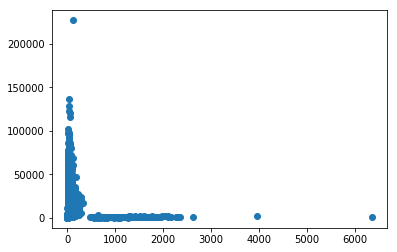

In [164]:
plt.scatter(x, y)

In [179]:
#거래량과 변동폭을 이용한 상관분석
var_cor = stock_data2[['거래량','변동폭']].corr()

In [177]:
stock_data2[['거래량','변동폭']].corr()

,거래량,변동폭
거래량,1.000000,-0.205824
변동폭,-0.205824,1.000000


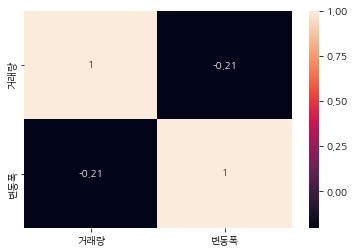

In [183]:
sns.heatmap(var_cor,annot=True)

In [189]:
from scipy import stats

In [190]:
stats.chisquare(stock_data2['거래량'],stock_data2['변동폭'])

C:\Users\tlsal\Anaconda3\lib\site-packages\scipy\stats\stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\tlsal\Anaconda3\lib\site-packages\scipy\stats\stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\tlsal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\tlsal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\tlsal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Power_divergenceResult(statistic=nan, pvalue=nan)

#통계검정 사이트 (p-value중심) http://blog.naver.com/PostView.nhn?blogId=nonamed0000&logNo=220908890568&parentCategoryNo=&categoryNo=26&viewDate=&isShowPopularPosts=false&from=section

# 회귀분석

In [187]:
import statsmodels.api as sm
x = stock_data2["변동폭"] #키 생각하시면 됩니다. 
x = sm.add_constant(x) #상수 추가하고자 할 때 
y = stock_data2["거래량"]/100000 #몸무게 생각하시면 됩니다. x와 y의 척도 차이가 커서 줄이기 위해 /100000을 하였습니다. 
model = sm.OLS(y, x).fit() 
prediction = model.predict(x) 
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    거래량   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     253.8
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           6.04e-56
Time:                        15:12:19   Log-Likelihood:                -26539.
No. Observations:                5739   AIC:                         5.308e+04
Df Residuals:                    5737   BIC:                         5.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2445      0.490     31.095      0.000      14.283      16.206
변동폭           -0.0004    2.3e-05    -15.931      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     7671.211   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2472309.746
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     103.590   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### p-value는 유의하다는 것을 알 수 있지만 설명력을 봤을 때 높은 설명력을 갖지 못한다.(변동폭,거래량)

# 회귀 신경망 구축

#### https://cromboltz.tistory.com/23?category=626018